<a href="https://colab.research.google.com/github/Rexosaury/COMSYS-Hackathon-5-2025/blob/main/Face_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =======================
# 1. Mount Google Drive
# =======================
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install insightface
!pip install scikit-learn opencv-python-headless matplotlib
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 13.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 60.5 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp311-cp311-linux_x86_64.whl size=1060436 sha256=26f9350d7f2ed65605462a071b94626c6d15c9fac7e3d71685bc846e3e84bca0
  Stored in directory: /root/.cache/pip/wheels/27/d8/22/f52d858d16cd06e7b2e6aad34a1777dcfaf000be833bbf8146
Successfully built insightface
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.6 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import insightface

# Load ArcFace model with face detector
model = insightface.app.FaceAnalysis(name='buffalo_l')  # lightweight MobileFaceNet
model.prepare(ctx_id=0)  # Use CPU (or GPU if available)


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [ ]:
from tqdm import tqdm  # optional: pip install tqdm

def load_arcface_embeddings(data_path, max_images=None):
    X = []
    y = []
    count = 0
    skipped = 0
    frontal_name = "frontal"

    for label in tqdm(os.listdir(data_path)):
        class_dir = os.path.join(data_path, label)
        if not os.path.isdir(class_dir): continue

        class_name = frontal_name if "_frontal" in label else label

        for fname in os.listdir(class_dir):
            if max_images and count >= max_images:
                break

            fpath = os.path.join(class_dir, fname)
            if not fpath.lower().endswith(('.jpg', '.jpeg', '.png')): continue

            img = cv2.imread(fpath)
            if img is None: continue

            faces = model.get(img)
            if not faces:
                skipped += 1
                continue

            emb = faces[0].embedding
            X.append(emb)
            y.append(class_name)
            count += 1

            if count % 100 == 0:
              print(f"Processed {count} images...")


    print(f"✅ {len(X)} embeddings from {len(set(y))} classes. Skipped {skipped} images.")
    return np.array(X), np.array(y)


In [ ]:
X, y = load_arcface_embeddings("/content/drive/MyDrive/Task_B/train")


  4%|▍         | 37/877 [02:18<1:09:13,  4.95s/it]

Processed 100 images...


  9%|▉         | 77/877 [05:24<23:02,  1.73s/it]

Processed 200 images...


 15%|█▍        | 129/877 [07:59<22:21,  1.79s/it]

Processed 300 images...


 20%|█▉        | 173/877 [10:39<45:23,  3.87s/it]

Processed 400 images...


 25%|██▍       | 218/877 [12:48<20:06,  1.83s/it]

Processed 500 images...


 32%|███▏      | 278/877 [15:56<22:12,  2.23s/it]

Processed 600 images...


 38%|███▊      | 329/877 [18:36<14:15,  1.56s/it]

Processed 700 images...


 42%|████▏     | 368/877 [21:12<51:55,  6.12s/it]

Processed 800 images...


 46%|████▌     | 401/877 [23:42<1:10:51,  8.93s/it]

Processed 900 images...


 52%|█████▏    | 455/877 [26:18<10:03,  1.43s/it]

Processed 1000 images...


 55%|█████▍    | 479/877 [27:27<12:45,  1.92s/it]

Processed 1100 images...


 59%|█████▉    | 516/877 [31:34<16:20,  2.71s/it]

Processed 1200 images...


 68%|██████▊   | 594/877 [34:08<16:29,  3.50s/it]

Processed 1300 images...


 73%|███████▎  | 639/877 [35:43<07:53,  1.99s/it]

Processed 1400 images...
Processed 1500 images...
Processed 1600 images...


 80%|███████▉  | 699/877 [42:52<05:25,  1.83s/it]

Processed 1700 images...


 87%|████████▋ | 762/877 [45:29<05:19,  2.78s/it]

Processed 1800 images...


 97%|█████████▋| 853/877 [48:10<00:35,  1.46s/it]

Processed 1900 images...


100%|██████████| 877/877 [48:49<00:00,  3.34s/it]

✅ 1924 embeddings from 789 classes. Skipped 2 images.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [ ]:
print("✅ Accuracy:", clf.score(X_test, y_test) * 100)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


✅ Accuracy: 63.148788927335644
                              precision    recall  f1-score   support

            Abdullatif_Sener       1.00      1.00      1.00         1
                Ahmad_Masood       1.00      1.00      1.00         1
               Aishwarya_Rai       0.00      0.00      0.00         1
                Aiysha_Smith       0.00      0.00      0.00         1
                     Al_Gore       1.00      1.00      1.00         3
                   Alan_Ball       1.00      1.00      1.00         1
      Alberto_Ruiz_Gallardon       1.00      1.00      1.00         1
        Alejandro_Atchugarry       1.00      1.00      1.00         1
      Aleksander_Kwasniewski       1.00      1.00      1.00         1
                   Alex_King       0.00      0.00      0.00         1
                Alfredo_Pena       0.00      0.00      0.00         1
               Ali_Fallahian       0.00      0.00      0.00         1
                Ali_Khamenei       1.00      1.00      1.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
def classify_image(path, clf, threshold=0.5):
    img = cv2.imread(path)
    if img is None:
        print("❌ Image not found.")
        return

    faces = model.get(img)
    if not faces:
        print("❌ No face detected.")
        return

    emb = np.expand_dims(faces[0].embedding, axis=0)
    probs = clf.predict_proba(emb)[0]
    pred = clf.classes_[np.argmax(probs)]
    prob = np.max(probs)

    label = pred if prob >= threshold else "unknown"

    # Show result
    bbox = faces[0].bbox.astype(int)
    face_crop = img[bbox[1]:bbox[3], bbox[0]:bbox[2]]
    face_crop = cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB)
    plt.imshow(face_crop)
    plt.title(f"{label} ({prob*100:.2f}%)")
    plt.axis("off")
    plt.show()


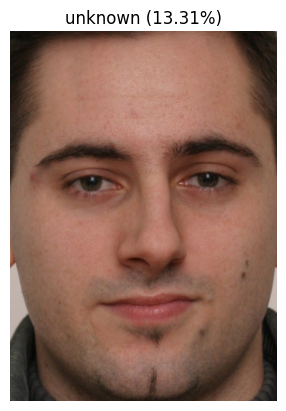

In [ ]:
classify_image("/content/drive/MyDrive/Task_B/train/016_frontal/016_frontal.jpg", clf)

In [ ]:
correct_indices = y_pred == y_test
confidences = clf.predict_proba(X)[np.arange(len(y_test)), clf.classes_.tolist().index(y_pred[0])]
for i, (pred, true, prob) in enumerate(zip(y_pred, y_test, confidences)):
    if pred == true:
        print(f"✅ Correct: {true} | Predicted: {pred} | Prob: {prob*100:.2f}%")
    else:
        print(f"❌ Wrong: {true} | Predicted: {pred} | Prob: {prob*100:.2f}%")


❌ Wrong: Ed_Book | Predicted: frontal | Prob: 8.69%
❌ Wrong: Charles_Lebois | Predicted: frontal | Prob: 9.59%
✅ Correct: Maria_Shriver | Predicted: Maria_Shriver | Prob: 4.27%
✅ Correct: Monica_Seles | Predicted: Monica_Seles | Prob: 4.31%
✅ Correct: Patricia_Heaton | Predicted: Patricia_Heaton | Prob: 4.35%
✅ Correct: Hugo_Chavez | Predicted: Hugo_Chavez | Prob: 4.34%
✅ Correct: Mike_Holmgren | Predicted: Mike_Holmgren | Prob: 9.78%
✅ Correct: Naomi_Watts | Predicted: Naomi_Watts | Prob: 9.40%
✅ Correct: Peter_Bacanovic | Predicted: Peter_Bacanovic | Prob: 8.62%
✅ Correct: Li_Zhaoxing | Predicted: Li_Zhaoxing | Prob: 10.04%
❌ Wrong: Crispin_Glover | Predicted: frontal | Prob: 9.98%
✅ Correct: Hugo_Chavez | Predicted: Hugo_Chavez | Prob: 10.36%
✅ Correct: Kate_Hudson | Predicted: Kate_Hudson | Prob: 9.51%
✅ Correct: Martha_Burk | Predicted: Martha_Burk | Prob: 9.78%
✅ Correct: Colin_Powell | Predicted: Colin_Powell | Prob: 10.30%
❌ Wrong: Billy_Tibbets | Predicted: frontal | Prob: 9.6